In [1]:
import numpy as np #importing numpy
import pandas as pd #importing pandas
import PIL #importing pillow for image processing
from PIL import Image#importing image from pillow library
import skimage#importing skimage library
import os#importing os library
import time#importing time library
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

#Capture start time of the program
start_time = time.time()

In [2]:
#changing path
os.chdir('D://DKIT//dissertation//Dataset_of_Tomato_Leaves//plantvillage//Preprocessed_data//64//vector//')

In [3]:
#reading numpy array data
rgb_test = np.load('rgb_data.npy')
#reading csv file
rgb_df = pd.read_csv('rgb_data.csv')

In [4]:
features = pd.DataFrame(rgb_test)

In [5]:
features = features.values

In [6]:
n_classes = rgb_df['disease'].unique()
x = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(x)):
    rgb_df.replace(to_replace=n_classes[i],value = x[i],inplace = True)

In [7]:
print(n_classes)

['bacterial_spot' 'early_blight' 'healthy' 'late_blight' 'leaf_mold'
 'septoria_leaf_spot' 'target_spot' 'tomato_mosaic_virus'
 'tomato_yellow_leaf_curl_virus' 'two-spotted_spider_mite']


In [8]:
target = rgb_df['disease'].values

In [9]:
target_binary = label_binarize(target, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = target_binary.shape[1]

In [10]:
#scaling the data using standard scaler
from sklearn.preprocessing import Normalizer
scaler = Normalizer()

In [11]:
#splitting the data to 80 percent and 20 percent
from sklearn.model_selection import train_test_split
Ftrain,Ftest,Ltrain,Ltest=train_test_split(features,target_binary, test_size=0.20, random_state=24)

In [12]:
#scaling the data
Ftrain_scaled = scaler.fit_transform(Ftrain)
Ftest_scaled = scaler.fit_transform(Ftest)

In [13]:
#importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score

In [14]:
svm_classifier = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True))
y_score = svm_classifier.fit(Ftrain_scaled,Ltrain).decision_function(Ftest_scaled)

In [15]:
y_score

array([[-0.9560088 , -1.01288756, -0.99205603, ..., -1.07051967,
        -2.50776833, -0.96975551],
       [-0.97839162, -1.01241637, -0.24303759, ..., -1.10142759,
        -2.21571118, -1.31731435],
       [-1.22813558, -1.01169483, -2.32118489, ..., -1.06411856,
         0.18297261, -1.29843008],
       ...,
       [-1.18557506, -1.00443179, -2.54679659, ..., -1.0696404 ,
         0.90808443, -1.36557678],
       [-1.10118923, -1.01830365, -1.35214807, ..., -1.23412691,
         1.56545409, -1.46713248],
       [-1.1219894 , -1.01535267, -1.90179919, ..., -1.27909085,
         2.11876104, -1.7338955 ]])

In [16]:
n_classes

10

In [17]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Ltest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [18]:
colours = ['red','green','blue','yellow','orange','aqua','cyan','navy','cornflowerblue','darkblue']

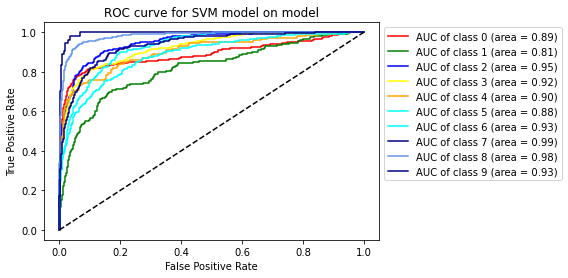

In [19]:
for i, color in zip(range(n_classes), colours):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="AUC of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for SVM model on model")
plt.legend(bbox_to_anchor = (1,1))
plt.show()